### Homework 1 (parte 1)

In [39]:
#install.packages("ggplot2")
#install.packages("GGally")
#install.packages("MASS")
#install.packages("caret")
library(ggplot2)
library(GGally)
library(MASS)

In [60]:
data(Boston)
str(Boston)
?Boston

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


Boston {MASS},R Documentation


Vemos que los valores de MEDV se distribuyen de manera normal, pero esta sesgada hacia la derecha. (Outlier)

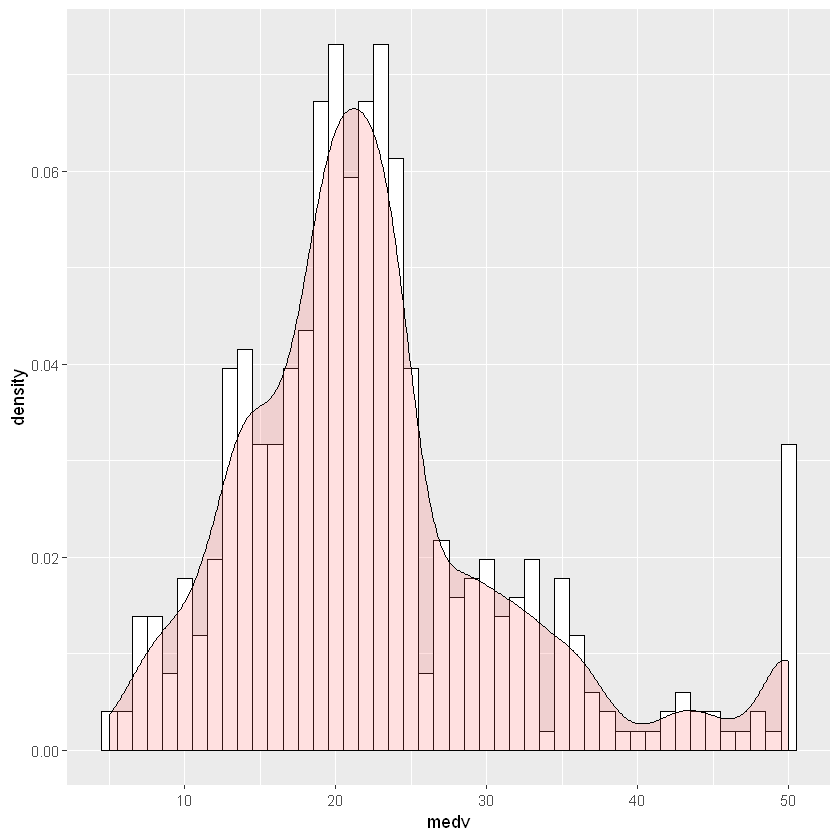

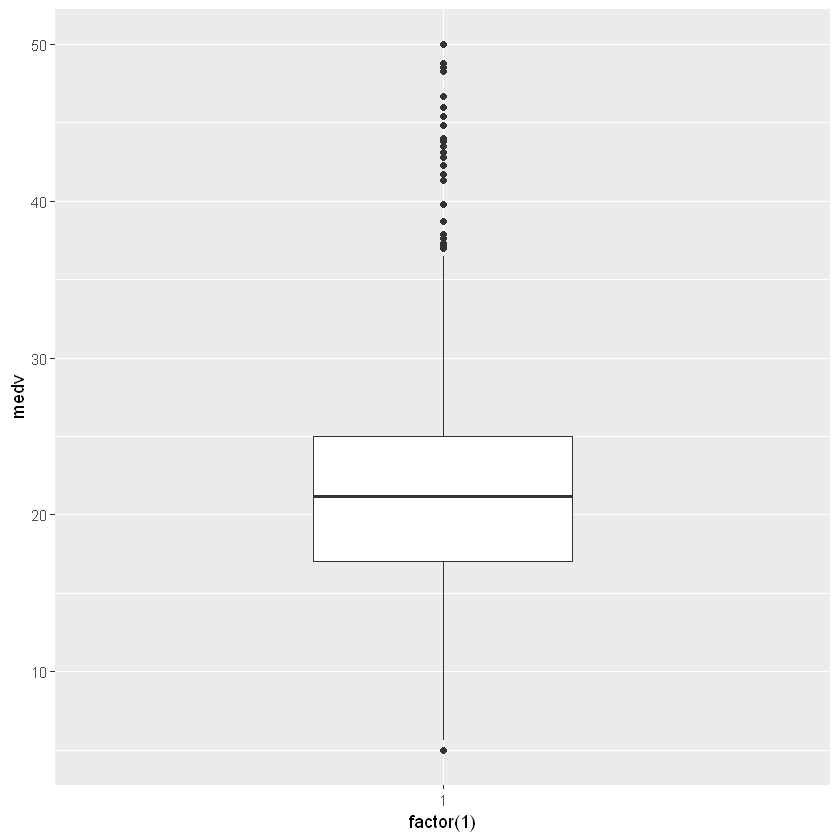

In [41]:
ggplot(Boston, aes(x=medv)) + 
    geom_histogram(aes(y=..density..), binwidth=1, colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

ggplot(Boston, aes(x=factor(1), y=medv)) +
    geom_boxplot(width = 0.4, fill = "white")

Ahora vamos a tratar de analizar los datos de cada variable y como afectan a la variable objetivo MEDV.

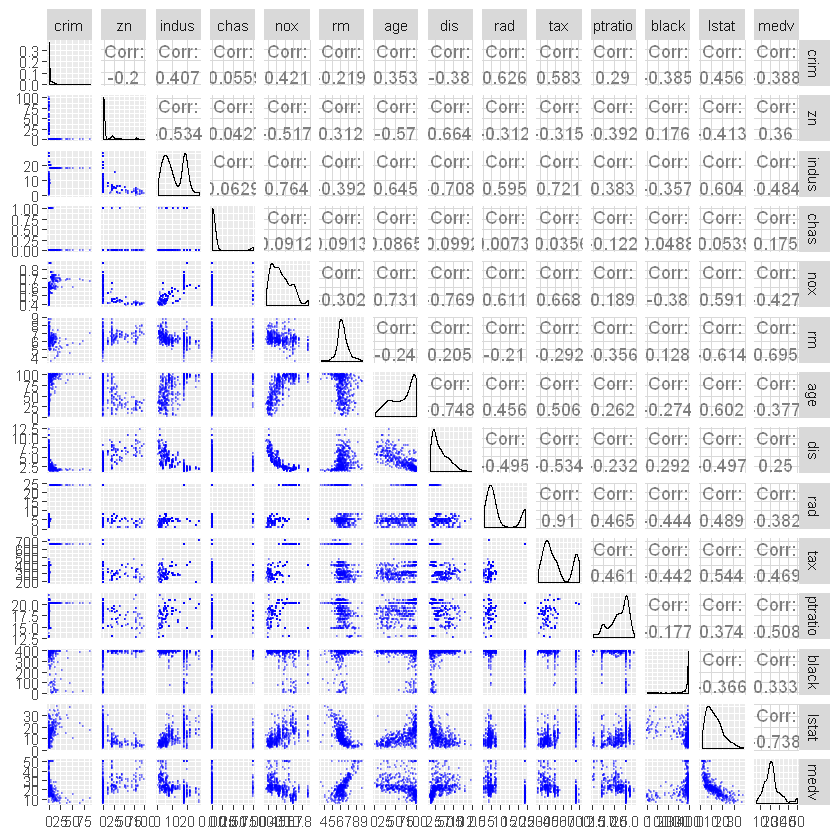

In [42]:
lowerFn <- function(data, mapping, ...) {
  p <- ggplot(data = data, mapping = mapping) +
    geom_point(color = 'blue', alpha=0.3, size=0.2)
  p
}

ggpairs( 
  data = Boston,
  lower = list(
    continuous =  wrap(lowerFn)
  )
)

Podemos ver que tenemos variables que más o menos consiguen tener una distribucion simetrica (normal), como por ejemplo, RM, LSTAT, PTRATIO y NOX. Tambien vemos variables con distribucion bimodal, como es el caso de RAD, TAX e INDUS entre las más destacadas.

Ahora vamos a ver la correlación de estas variables con la variable objectivo y también nos podemos ayudar de los graficos en azul.

In [43]:
round(cor(Boston, Boston$medv),2)

crim,-0.39
zn,0.36
indus,-0.48
chas,0.18
nox,-0.43
rm,0.70
age,-0.38
dis,0.25
rad,-0.38
tax,-0.47
ptratio,-0.51


Analizando los datos podemos hacer suposiciones sobre las variables y su relación con la variable objetivo.

Para ajustar un modelo de regresión lineal, seleccionamos aquellas características que tienen una alta correlación con nuestra variable objetivo MEDV. Al observar la matriz de correlación podemos ver que RM tiene una fuerte correlación positiva con MEDV (0.7), mientras que LSTAT tiene una alta correlación negativa con MEDV (-0.74). El PTRATIO tambien es una variable a tener en cuenta con una correlación negativa (-0.5).

Las casas con más habitaciones (valor RM más alto) valdrán más. Normalmente las casas con más habitaciones son más grandes y pueden caber más personas, por lo que es razonable que cuesten más dinero. Son variables directamente proporcionales.

Los vecindarios con más trabajadores de clase baja (valor LSTAT más alto) valdrán menos. Si el porcentaje de la clase obrera es más alto, es probable que tengan un bajo poder adquisitivo y, por lo tanto, las viviendas cuesten menos. Son variables inversamente proporcionales.

Otra variable que podemos tener en cuenta es PTRATIO. Los vecindarios con una mayor proporción de estudiantes por maestro (valor PTRATIO más alto) valdrán menos. Si el porcentaje de estudiantes por maestro es más alto, es probable que en el vecindario haya menos escuelas, esto podría deberse a que hay menos ingresos fiscales, lo que podría deberse a que en ese vecindario la gente gana menos dinero. Si la gente gana menos dinero, es probable que sus casas valgan menos. Son variables inversamente proporcionales.

Generamos un modelo con todas las variables para ver que mas podemos deducir.

In [44]:
fit.lm1 <- lm(medv~.,data = Boston)
summary(fit.lm1)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

Existe una situación extrema, llamada multicolinealidad, en la que existe colinealidad entre tres o más variables aunque ningún par de variables tenga una correlación particularmente alta. Esto significa que hay redundancia entre las variables predictoras.

En presencia de multicolinealidad, la solución del modelo de regresión se vuelve inestable.

Para un predictor dado (p), la multicolinealidad puede evaluarse calculando una puntuación llamada factor de inflación de varianza (o VIF), que mide en qué medida se infla la varianza de un coeficiente de regresión debido a la multicolinealidad en el modelo.

In [45]:
library(car)
vif(fit.lm1)

crim       zn    indus     chas      nox       rm      age      dis 
1.792192 2.298758 3.991596 1.073995 4.393720 1.933744 3.100826 3.955945 
     rad      tax  ptratio    black    lstat 
7.484496 9.008554 1.799084 1.348521 2.941491

Vemos que TAX y RAD tienen un problema de multicolinealidad, pero podriamos agregar RAD ya que el valor VIF no es tan alto como TAX

In [46]:
fit.lm2 <- lm(formula = medv ~ crim + zn + chas + nox + rm + rad + dis + ptratio + black + lstat, data = Boston)
summary(fit.lm2)


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + rad + dis + 
    ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.2609  -2.9888  -0.5083   1.8041  26.2482 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  34.712342   5.102742   6.803 2.97e-11 ***
crim         -0.104843   0.033132  -3.164 0.001650 ** 
zn            0.036634   0.013412   2.731 0.006532 ** 
chas          2.967868   0.860830   3.448 0.000614 ***
nox         -20.314416   3.472292  -5.850 8.92e-09 ***
rm            3.977104   0.407731   9.754  < 2e-16 ***
rad           0.128761   0.040788   3.157 0.001692 ** 
dis          -1.429370   0.186922  -7.647 1.08e-13 ***
ptratio      -1.014914   0.129006  -7.867 2.30e-14 ***
black         0.009700   0.002701   3.591 0.000363 ***
lstat        -0.528147   0.047930 -11.019  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.79 on 495 de

También vimos que la variable de salida MEDV estaba inclinada hacia la derecha. Si aplicamos un log a la variable normalizaría la distribución de MEDV. Vamos a realizar lm con log(MEDV) como resultado y todas las características anteriores como entrada.

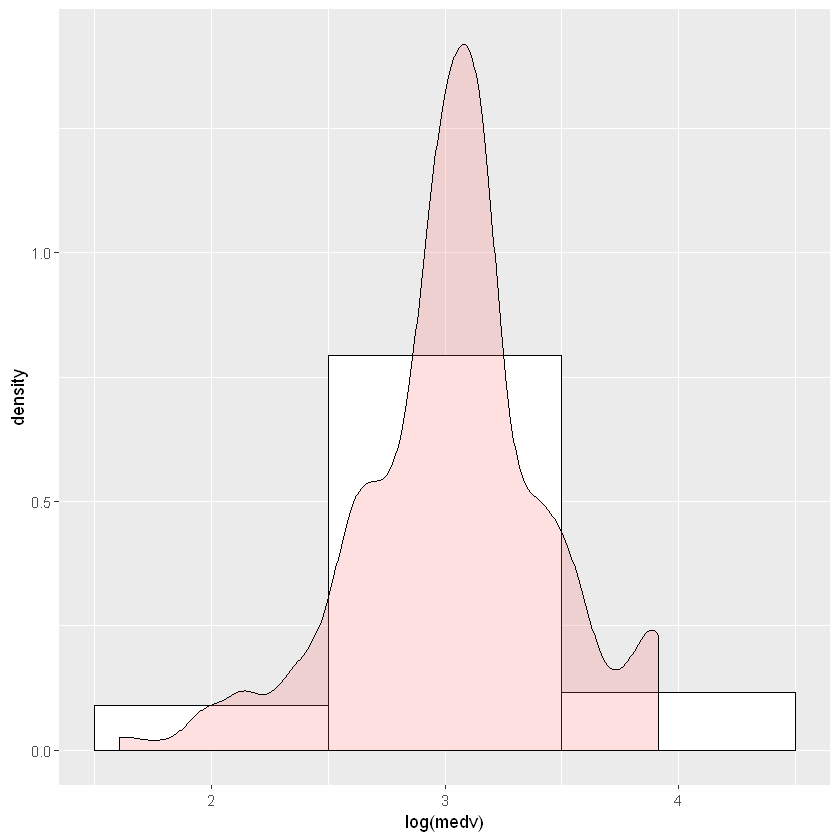

In [47]:
ggplot(Boston, aes(x=log(medv))) + 
    geom_histogram(aes(y=..density..), binwidth=1, colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

In [48]:
fit.lm3 <- lm(formula = log(medv) ~ crim + zn + chas + nox + rm + rad + dis + ptratio + black + lstat, data = Boston)
summary(fit.lm3)


Call:
lm(formula = log(medv) ~ crim + zn + chas + nox + rm + rad + 
    dis + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73447 -0.10493 -0.01084  0.09297  0.87348 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.0065321  0.2054382  19.502  < 2e-16 ***
crim        -0.0101496  0.0013339  -7.609 1.41e-13 ***
zn           0.0006511  0.0005400   1.206 0.228470    
chas         0.1169498  0.0346573   3.374 0.000798 ***
nox         -0.8609244  0.1397957  -6.158 1.52e-09 ***
rm           0.0989867  0.0164154   6.030 3.21e-09 ***
rad          0.0053533  0.0016421   3.260 0.001191 ** 
dis         -0.0487057  0.0075256  -6.472 2.33e-10 ***
ptratio     -0.0406652  0.0051938  -7.830 3.00e-14 ***
black        0.0004321  0.0001088   3.973 8.15e-05 ***
lstat       -0.0288688  0.0019297 -14.960  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1928 on

Vemos una mejoria significativa en R^2

Ahora aplicaremos una estrategia stepwise para ver cuales son las mejoras variables predictoras, y comparar con el analisis hecho previamente.

In [49]:
full.model <- lm(medv ~., data = Boston)
step.model <- stepAIC(full.model, direction = "both")
summary(step.model)

Start:  AIC=1589.64
medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + 
    tax + ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- age      1      0.06 11079 1587.7
- indus    1      2.52 11081 1587.8
<none>                 11079 1589.6
- chas     1    218.97 11298 1597.5
- tax      1    242.26 11321 1598.6
- crim     1    243.22 11322 1598.6
- zn       1    257.49 11336 1599.3
- black    1    270.63 11349 1599.8
- rad      1    479.15 11558 1609.1
- nox      1    487.16 11566 1609.4
- ptratio  1   1194.23 12273 1639.4
- dis      1   1232.41 12311 1641.0
- rm       1   1871.32 12950 1666.6
- lstat    1   2410.84 13490 1687.3

Step:  AIC=1587.65
medv ~ crim + zn + indus + chas + nox + rm + dis + rad + tax + 
    ptratio + black + lstat

          Df Sum of Sq   RSS    AIC
- indus    1      2.52 11081 1585.8
<none>                 11079 1587.7
+ age      1      0.06 11079 1589.6
- chas     1    219.91 11299 1595.6
- tax      1    242.24 11321 1596.6
- crim     1


Call:
lm(formula = medv ~ crim + zn + chas + nox + rm + dis + rad + 
    tax + ptratio + black + lstat, data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.5984  -2.7386  -0.5046   1.7273  26.2373 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.341145   5.067492   7.171 2.73e-12 ***
crim         -0.108413   0.032779  -3.307 0.001010 ** 
zn            0.045845   0.013523   3.390 0.000754 ***
chas          2.718716   0.854240   3.183 0.001551 ** 
nox         -17.376023   3.535243  -4.915 1.21e-06 ***
rm            3.801579   0.406316   9.356  < 2e-16 ***
dis          -1.492711   0.185731  -8.037 6.84e-15 ***
rad           0.299608   0.063402   4.726 3.00e-06 ***
tax          -0.011778   0.003372  -3.493 0.000521 ***
ptratio      -0.946525   0.129066  -7.334 9.24e-13 ***
black         0.009291   0.002674   3.475 0.000557 ***
lstat        -0.522553   0.047424 -11.019  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*

Analizando la suma de cuadrados residual (RSS), el modelo fit.lm3 es el que mejor resultado nos ha dado. Un RSS más pequeño significa que el modelo se ajusta bien a los datos. Pero tambien podriamos ajustarlos demasiado y estariamos en el caso de un overfitting. También podemos ver que tenemos un kappa relativamente más para este último en comparación con los otros modelos pero igual al fit.lm2, pero en este caso este último gana por tener un RSS más bajo.

In [50]:
anova(fit.lm1, fit.lm2)
lm1.medv<-model.matrix(fit.lm1)
lm2.medv<-model.matrix(fit.lm2)
kappa(lm1.medv)
kappa(lm2.medv)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
492,11078.78,NA,NA,NA,NA
495,11354.98,-3,-276.1987,4.088587,0.006958473


[1] 11177.64

[1] 7862.936

In [51]:
anova(step.model)
step.model.medv<-model.matrix(step.model)
kappa(step.model.medv)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
crim,1,6440.78306,6440.78306,287.12592,4.160491e-51
zn,1,3554.33620,3554.33620,158.45000,1.039646e-31
chas,1,1233.79102,1233.79102,55.00160,5.281929e-13
nox,1,1592.39211,1592.39211,70.98780,3.947261e-16
rm,1,12090.95685,12090.95685,539.00699,3.650590e-81
dis,1,1122.01388,1122.01388,50.01865,5.233504e-12
rad,1,97.53014,97.53014,4.34783,3.756894e-02
tax,1,669.32437,669.32437,29.83805,7.455990e-08
ptratio,1,1519.74762,1519.74762,67.74936,1.665508e-15


[1] 11806.77

In [52]:
anova(fit.lm3)
lm3.medv<-model.matrix(fit.lm3)
kappa(lm3.medv)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
crim,1,23.5180380,23.51803797,632.50604,1.565413e-90
zn,1,5.8292814,5.82928139,156.77565,1.934686e-31
chas,1,1.7449751,1.74497512,46.93025,2.191224e-11
nox,1,4.6805467,4.68054671,125.88100,3.489692e-26
rm,1,15.9541430,15.95414305,429.07881,4.186083e-69
rad,1,0.2198802,0.21988020,5.91357,1.537836e-02
dis,1,1.1070782,1.10707821,29.77432,7.683825e-08
ptratio,1,3.1470927,3.14709274,84.63951,1.000988e-18
black,1,1.4484160,1.44841598,38.95443,9.330757e-10


[1] 7862.936

### Homework 1 (parte 2)

In [58]:
fearn.train <- read.table("Fearn.data.1.txt", header = TRUE, sep = "", dec = ".")
fearn.train

y,x1,x2,x3,x4,x5,x6
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
9.23,468,123,246,374,386,-11
8.01,458,112,236,368,383,-15
10.95,457,118,240,359,353,-16
11.67,450,115,236,352,340,-15
10.41,464,119,243,366,371,-16
9.51,499,147,273,404,433,5
8.67,463,119,242,370,377,-12
7.75,462,115,238,370,353,-13
8.05,488,134,258,393,377,-5


In [59]:
fearn.test <- read.table("Fearn.data.2.txt", header = TRUE, sep = "", dec = ".")
fearn.test

y,x1,x2,x3,x4,x5,x6
<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
8.66,486,144,266,393,373,26
7.90,485,136,260,393,395,6
9.27,482,136,260,388,423,-2
11.77,443,112,232,346,355,-18
9.70,478,134,257,382,390,-5
10.46,449,113,233,351,343,-18
10.17,461,121,243,366,378,-14
11.10,503,155,280,403,414,6
12.03,493,146,271,390,378,-3


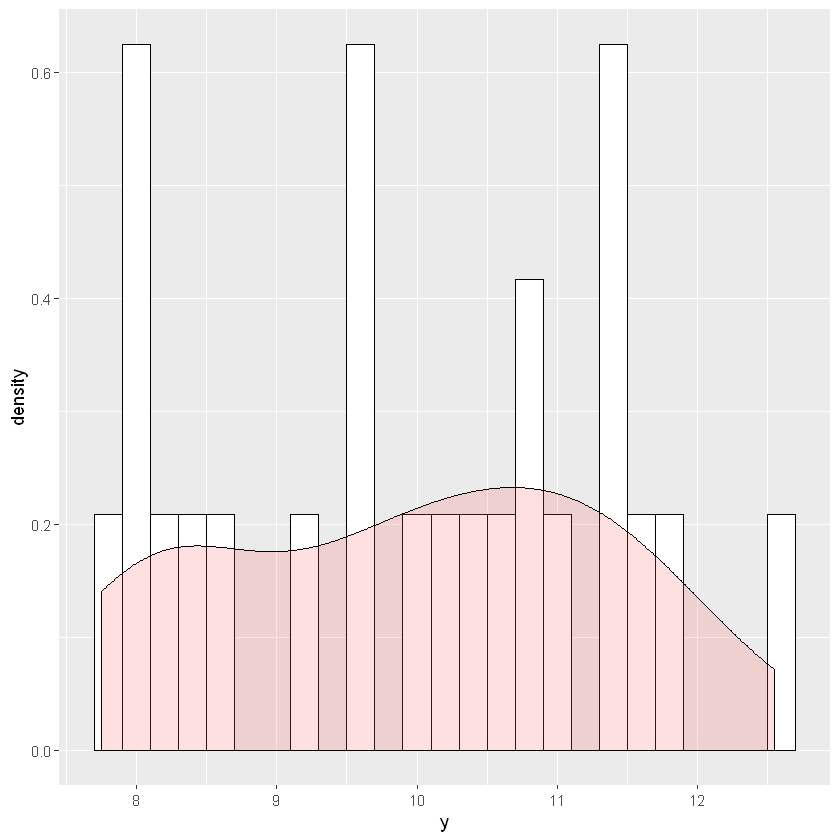

In [64]:
ggplot(fearn.train, aes(x=y)) + 
    geom_histogram(aes(y=..density..), binwidth=0.2, colour="black", fill="white") +
    geom_density(alpha=.2, fill="#FF6666")

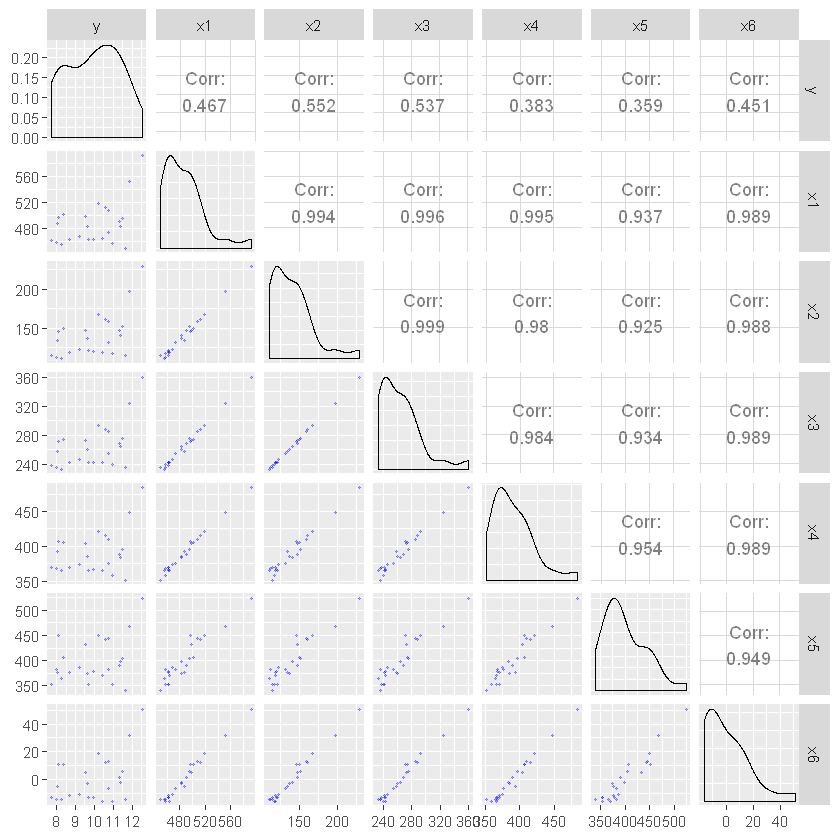

In [67]:
lowerFn <- function(data, mapping, ...) {
  p <- ggplot(data = data, mapping = mapping) +
    geom_point(color = 'blue', alpha=0.3, size=0.5)
  p
}

ggpairs( 
  data = fearn.train,
  lower = list(
    continuous =  wrap(lowerFn)
  )
)

In [208]:
#install.packages("Metrics")
require(Metrics)

fearn.lm1 <- lm(y ~ ., data = fearn.train)
summary(fearn.lm1)
predictions <- predict(fearn.lm1, newdata=fearn.test,  type='response')

#confMat <- table(round(predictions, digits=3), as.factor(fearn.test$y))
#accuracy <- sum(diag(confMat))/sum(confMat)
rmse <- sqrt(sum((exp(predictions) - fearn.test$y)^2)/length(fearn.test$y))
rmse(predictions,fearn.test)
c(RMSE = rmse)


Call:
lm(formula = y ~ ., data = fearn.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39798 -0.12660 -0.00822  0.07745  0.38705 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) 23.074230   9.899022   2.331  0.03232 * 
x1           0.028124   0.082118   0.342  0.73618   
x2           0.001667   0.087162   0.019  0.98497   
x3           0.234909   0.077400   3.035  0.00748 **
x4          -0.240445   0.063218  -3.803  0.00142 **
x5           0.011839   0.006126   1.932  0.07014 . 
x6          -0.035584   0.045530  -0.782  0.44522   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2203 on 17 degrees of freedom
Multiple R-squared:  0.9821,	Adjusted R-squared:  0.9758 
F-statistic: 155.9 on 6 and 17 DF,  p-value: 6.654e-14


Warning message in mean.default(se(actual, predicted)):
"argument is not numeric or logical: returning NA"

[1] NA

RMSE 
282675.9

In [200]:
fearn.lm2 <- lm(y ~ x3 + x4 + x5, data = fearn.train)
summary(fearn.lm2)
predictions <- predict(fearn.lm2, newdata=fearn.test)
#confMat <- table(predictions, as.factor(fearn.test$y))
#confMat
#accuracy <- sum(diag(confMat))/sum(confMat)
rmse <- sqrt(sum((exp(predictions) - fearn.test$y)^2)/length(fearn.test$y))
c(RMSE = rmse)


Call:
lm(formula = y ~ x3 + x4 + x5, data = fearn.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39419 -0.09315 -0.04917  0.16961  0.41330 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.619074   1.338621  24.368 2.41e-16 ***
x3           0.242654   0.008803  27.564  < 2e-16 ***
x4          -0.230867   0.010488 -22.012 1.72e-15 ***
x5           0.008339   0.003561   2.342   0.0297 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2249 on 20 degrees of freedom
Multiple R-squared:  0.9781,	Adjusted R-squared:  0.9748 
F-statistic: 298.1 on 3 and 20 DF,  p-value: < 2.2e-16


RMSE 
248853

In [203]:
fearn.full.model <- lm(y ~., data = fearn.train)
fearn.step.model <- stepAIC(fearn.full.model, direction = "both")
summary(fearn.step.model)
predictions <- predict(fearn.step.model, newdata=fearn.test)
rmse <- sqrt(sum((exp(predictions) - fearn.test$y)^2)/length(fearn.test$y))
c(RMSE = rmse)

Start:  AIC=-66.88
y ~ x1 + x2 + x3 + x4 + x5 + x6

       Df Sum of Sq     RSS     AIC
- x2    1   0.00002 0.82535 -68.880
- x1    1   0.00569 0.83103 -68.715
- x6    1   0.02966 0.85499 -68.033
<none>              0.82534 -66.880
- x5    1   0.18130 1.00664 -64.114
- x3    1   0.44719 1.27253 -58.489
- x4    1   0.70231 1.52765 -54.104

Step:  AIC=-68.88
y ~ x1 + x3 + x4 + x5 + x6

       Df Sum of Sq     RSS     AIC
- x1    1   0.00754 0.83290 -70.662
- x6    1   0.05565 0.88101 -69.314
<none>              0.82535 -68.880
+ x2    1   0.00002 0.82534 -66.880
- x5    1   0.18642 1.01177 -65.992
- x4    1   1.02169 1.84704 -51.547
- x3    1   1.10504 1.93039 -50.488

Step:  AIC=-70.66
y ~ x3 + x4 + x5 + x6

       Df Sum of Sq     RSS     AIC
<none>               0.8329 -70.662
+ x1    1    0.0075  0.8254 -68.880
+ x2    1    0.0019  0.8310 -68.715
- x6    1    0.1786  1.0115 -67.999
- x5    1    0.3710  1.2039 -63.819
- x4    1   17.8673 18.7002   2.012
- x3    1   27.1447 27.9776  11


Call:
lm(formula = y ~ x3 + x4 + x5 + x6, data = fearn.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41074 -0.11859 -0.00127  0.08045  0.37768 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.820827   4.059503   6.114 7.05e-06 ***
x3           0.255080   0.010251  24.884 5.80e-16 ***
x4          -0.220902   0.010942 -20.189 2.68e-14 ***
x5           0.009906   0.003405   2.909  0.00899 ** 
x6          -0.044121   0.021859  -2.018  0.05789 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2094 on 19 degrees of freedom
Multiple R-squared:  0.982,	Adjusted R-squared:  0.9782 
F-statistic: 258.9 on 4 and 19 DF,  p-value: 2.77e-16


RMSE 
278153.9